In [1]:
import numpy as np
from numba import jit
import pandas as pd

import pints
import pints.plot
import pints_smol_jit as toy
import matplotlib.pyplot as plt



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


# true_parameters = [0.0004, 500]


times = np.linspace(20, 97,78)
# times = np.linspace(37, 97,61)

df = pd.read_csv('s11_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())

print(org_values)

print(org_values.shape)



Init 1
[[62.  61.5 42.5 ...  0.   0.   0. ]
 [56.5 60.  43.  ...  0.   0.   0. ]
 [50.5 60.  42.5 ...  0.   0.   0. ]
 ...
 [ 3.   2.5  2.  ...  0.   0.   1. ]
 [ 3.   4.   2.  ...  0.   0.   1. ]
 [ 2.   2.5  2.  ...  0.   0.   1. ]]
(78, 100)


Add noise to the data (using random sampling from normal distribution)

In [3]:

# noise = 0.25
# values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))

# size_noise = 100
# noise_value = 25
# # Create a list with the specified size filled with a placeholder value
# noise_arr = [noise_value for _ in range(size_noise)]


Set-up pints problem and log likelihoods

In [4]:

# problem = pints.MultiOutputProblem(model, times, values)
# times = np.linspace(37, 97,61)
problem = pints.MultiOutputProblem(model, times, org_values)


log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_likelihood = pints.GaussianLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood_2.n_parameters()))

# true_parameters += noise_arr
# print(true_parameters)
print(int(times[0]))



Original problem dimension: 2
New dimension: 2
20


Create uniform log prior

In [5]:

# # # Define the size of the list
# size = 102
# placeholder_lower_value = 1
# placeholder_upper_value = 50
 
# # # Create a list with the specified size filled with a placeholder value
# prior_arr_lower = [placeholder_lower_value for _ in range(size)]
# prior_arr_upper = [placeholder_upper_value for _ in range(size)]
# prior_arr_lower[0] = 0.0001
# prior_arr_upper[0] = 0.001
# prior_arr_lower[1] = 100
# prior_arr_upper[1] = 1000

log_prior = pints.LogPrior.LogUniformLogPrior(
    [0.000001, 100],
    [0.1, 5000]
    )
# log_prior = pints.UniformLogPrior(
#     prior_arr_lower,
#     prior_arr_upper
#     )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)


AttributeError: module 'pints' has no attribute 'LogUniformLogPrior'

In [ ]:

# guess_parameters = [0.0004, 500]
# size_noise = 100
# noise_value = 4
# # Create a list with the specified size filled with a placeholder value
# noise_arr = [noise_value for _ in range(size_noise)]
# guess_parameters += noise_arr
# print(guess_parameters)
# print(len(guess_parameters))

# xs = [
#     np.array(guess_parameters)*0.9,
#     np.array(guess_parameters)*1.05,
#     np.array(guess_parameters)*1.15
# ]

xs = [
    np.array([4e-04,700]),
    np.array([3.5e-04,1900]),
    np.array([3e-04,700]),
    np.array([2.5e-04,1900]),
]

# xs.set_max_iterations(9000)
# chains = pints.mcmc_sample(log_posterior, 3, xs)
# mcmc = pints.MCMCController(log_posterior, 6, xs)
mcmc = pints.MCMCController(log_posterior,  4, xs,method=pints.SliceDoublingMCMC)#
mcmc.set_max_iterations(7)
# mcmc.set_parallel(True)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     4       0:00.0
1     172     0:00.3
2     304     0:00.4
3     412     0:00.6
7     733     0:00.8
Halting: Maximum number of iterations (7) reached.
[[[4.00000000e-04 7.00000000e+02]
  [6.18343350e-05 2.22244449e+03]
  [1.14968140e-05 3.50659172e+03]
  [6.83677291e-06 2.54744653e+03]
  [4.97654626e-06 9.32651866e+02]
  [4.16818248e-06 1.04679335e+03]
  [3.13754092e-06 1.86792852e+02]]

 [[3.50000000e-04 1.90000000e+03]
  [1.54675667e-04 2.39213488e+03]
  [7.83442627e-05 1.36722902e+03]
  [3.92943845e-05 1.11174627e+03]
  [2.27376203e-05 4.23153472e+02]
  [9.40945002e-06 9.53897271e+02]
  [2.85899225e-06 1.06635088e+03]]

 [[3.00000000e-04 7.00000000e+02]
  [2.06438136e-05 1.34952303e+03]
  [1.54561294e-05 1.00988584e+03]
  [9.00242242e-06 9.54981437e+02]
  [8.93820379e-06 8.83470686e+02]
  [7.46712048e-06 6.09968298e+02]
  [5.92998996e-06 7.42266639e+02]]

 [[2.50000000e-04 1.90

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:546: RuntimeWarning: divide by zero encountered in log
  return np.sum(self._constant - self._n_over_2 * np.log(sse))


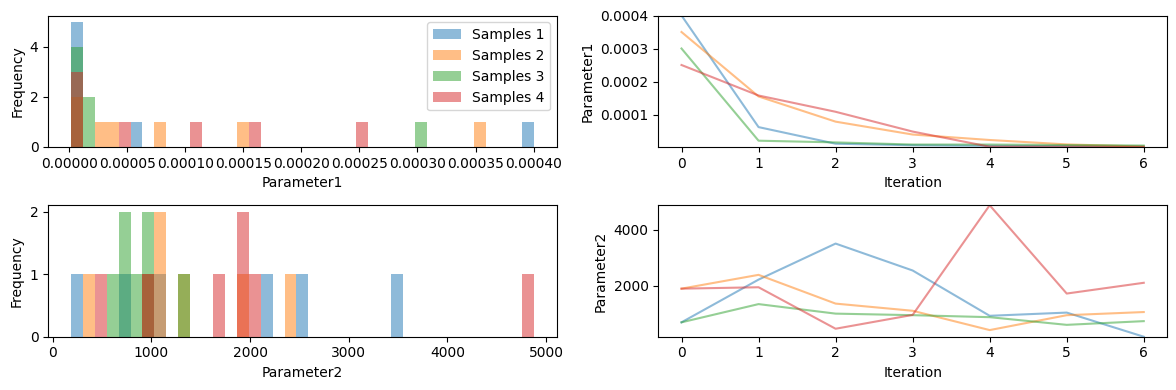

In [ ]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()